In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aaditi2505","key":"c9d4b15c2a6349574e04b6b7794caed8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
  0% 0.00/15.1M [00:00<?, ?B/s]
100% 15.1M/15.1M [00:00<00:00, 209MB/s]


In [ ]:
!unzip -q dataset-name.zip


unzip:  cannot find or open dataset-name.zip, dataset-name.zip.zip or dataset-name.zip.ZIP.


In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:

!unzip -q /content/brain-mri-images-for-brain-tumor-detection.zip -d /content/brain_tumor_data


In [ ]:
import os
os.listdir('/content/brain_tumor_data')


['yes', 'no', 'brain_tumor_dataset']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80/20 train-validation split
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/brain_tumor_data',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/content/brain_tumor_data',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 406 images belonging to 3 classes.
Found 100 images belonging to 3 classes.


In [ ]:
 model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
 ])
 model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 model.compile(optimizer='adam', loss='binary_crossentropy',
 metrics=['accuracy'])
 model.fit(train_generator, epochs=1, validation_data=validation_generator,
batch_size= BATCH_SIZE)

13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.2993 - loss: 3.5922 - val_accuracy: 0.1900 - val_loss: 0.1901


In [ ]:
model.save('/content/brain_tumor_data/data.h5')

In [ ]:
 from tensorflow.keras.models import load_model
 from tensorflow.keras.preprocessing import image
 import matplotlib.pyplot as plt #visualisation
 import numpy as np
 model =load_model('/content/brain_tumor_data/data.h5')
 print("Model Loaded")

Model Loaded


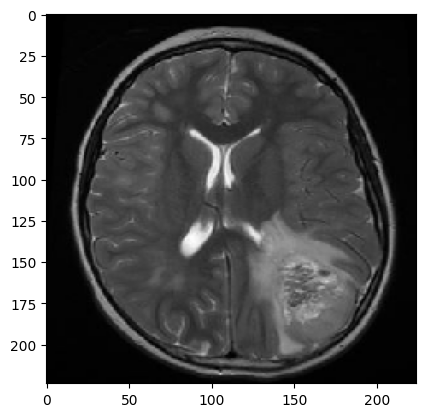

In [ ]:
 test_image_path="/content/brain_tumor_data/brain_tumor_dataset/yes/Y100.JPG"
 img=image.load_img(test_image_path,target_size=(224,224))
 plt.imshow(img)
 plt.axis()
 plt.show()

In [ ]:
 img_array=image.img_to_array(img)
 img_array=np.expand_dims(img_array,axis=0)
 img_array /= 255

In [ ]:
 prediction =model.predict(img_array)
 print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0.8587427]]


In [ ]:
if prediction >= 0.5:
  print("Tumor Detected")
else:
  print("No Tumor Detected")

Tumor Detected
